In [1027]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1028]:
df = pd.read_csv("placement.csv")
df.head()
df.shape

(200, 2)

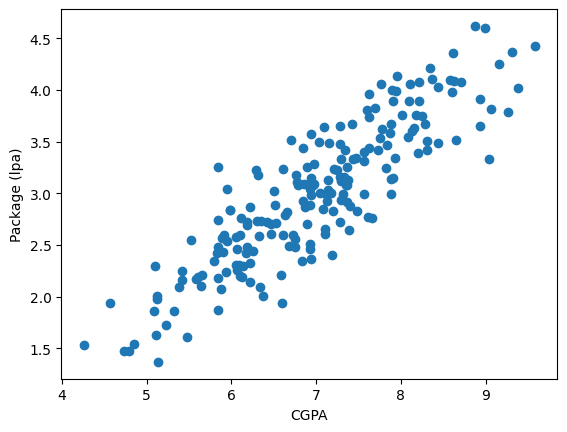

In [1029]:
plt.scatter(df["cgpa"],df["package"])
plt.xlabel("CGPA")
plt.ylabel("Package (lpa)")
plt.show()

In [1030]:
x= df.iloc[:,0:1]
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [1031]:
y = df.iloc[:,-1]
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [1032]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [1033]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [1034]:
lr = LinearRegression()

In [1035]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [1036]:
y_pred = lr.predict(x_test)

In [1037]:
r2_score(y_pred,y_test)

0.7738736258139096

## Using Augmentation for better results

In [1038]:
df["cgpa_squared"] = df["cgpa"]**2
df["cgpa_sqrt"] = np.sqrt(df["cgpa"])
df["cgpa_rel"] = (df["package"])*0.0000000001 + np.random.randint(1000,100000)

In [1039]:
x_combined = df[["cgpa","cgpa_squared","cgpa_sqrt","cgpa_rel"]].values
y_augumented = df["package"].values

In [1040]:
x_train_a,x_test_a,y_train_a,y_test_a = train_test_split(x_combined,y_augumented,test_size=0.15,random_state=42)

In [1041]:
lr2 = LinearRegression()
lr2.fit(x_train_a,y_train_a)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [1042]:
y_pred2 = lr2.predict(x_test_a)

In [1043]:
r2_score(y_test_a,y_pred2)

0.8586372788565179

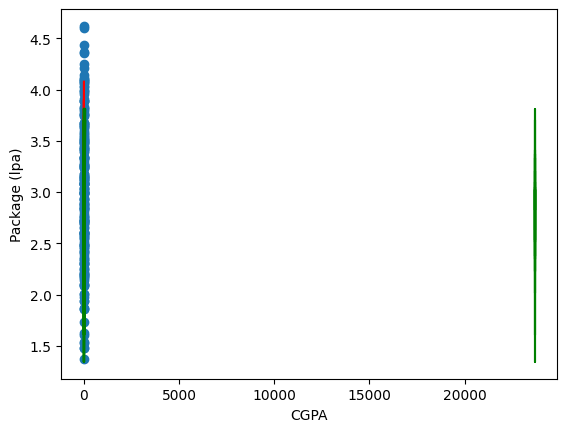

In [1044]:
plt.scatter(df["cgpa"],df["package"])
plt.plot(x_test,lr.predict(x_test),color = "red")
plt.plot(x_test_a,lr2.predict(x_test_a),color = "green")
plt.xlabel("CGPA")
plt.ylabel("Package (lpa)")
plt.show()